In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load the OCR dataset (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

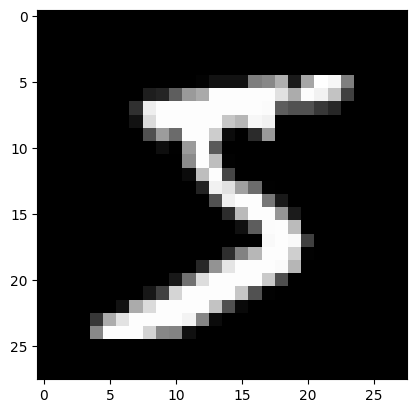

In [49]:
# Reshape the flattened image back to 28x28
image = x_train[0].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='grey')
plt.show()


In [40]:
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [41]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


In [42]:
# Define the model architecture
model = Sequential()
model.add(Input(shape=(784,)))  # Define the input layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [43]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [44]:
# Train the model
batch_size = 128
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7954 - loss: 13.2898 - val_accuracy: 0.9318 - val_loss: 0.3150
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8996 - loss: 0.5792 - val_accuracy: 0.9403 - val_loss: 0.2440
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9232 - loss: 0.4000 - val_accuracy: 0.9511 - val_loss: 0.1975
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9348 - loss: 0.3434 - val_accuracy: 0.9528 - val_loss: 0.2118
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9392 - loss: 0.3142 - val_accuracy: 0.9615 - val_loss: 0.1909


In [45]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19089750945568085
Test accuracy: 0.9614999890327454
